In [4]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.io import arff

In [5]:
balance_data = arff.loadarff('covidbalance.arff')
balancedata = pd.DataFrame(balance_data[0])
balancedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6202 entries, 0 to 6201
Data columns (total 38 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Patient age quantile                                   6202 non-null   float64
 1   SARS-Cov-2 exam result                                 6202 non-null   object 
 2   Patient addmited to regular ward (1=yes, 0=no)         6202 non-null   float64
 3   Patient addmited to semi-intensive unit (1=yes, 0=no)  6202 non-null   float64
 4   Patient addmited to intensive care unit (1=yes, 0=no)  6202 non-null   float64
 5   Hematocrit                                             6202 non-null   float64
 6   Hemoglobin                                             6202 non-null   float64
 7   Platelets                                              6202 non-null   float64
 8   Mean platelet volume                            

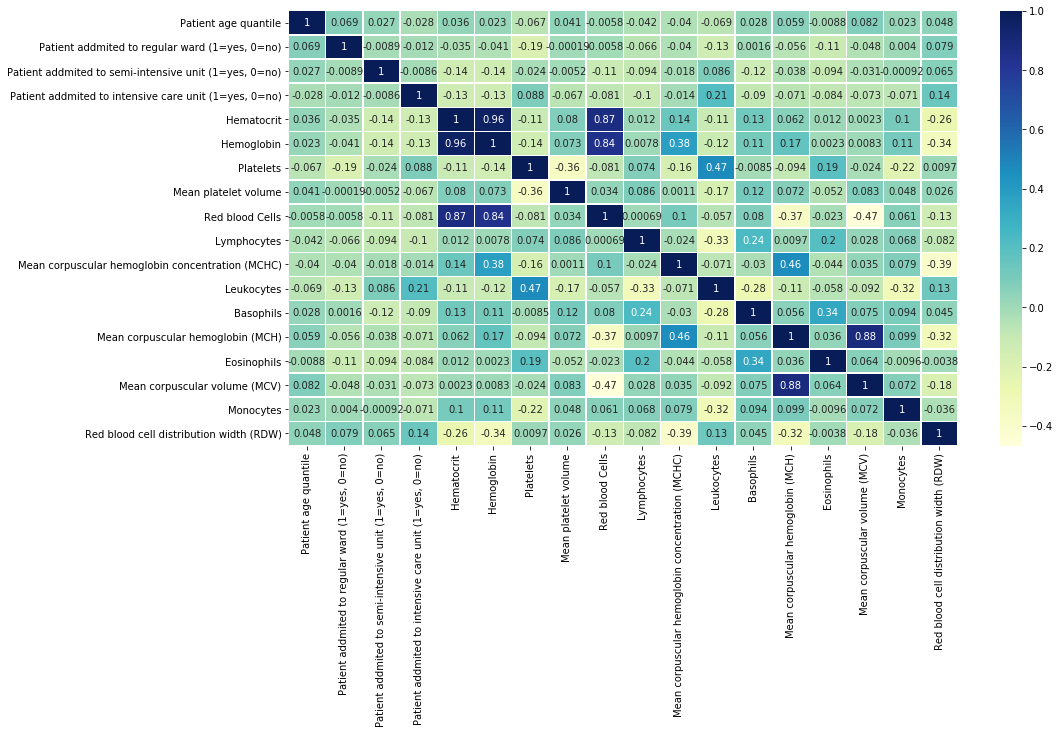

In [7]:
#heat map
# Correlation
corr = balancedata.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, linewidths=.5, cmap="YlGnBu")
plt.show()

In [ ]:
#Box plot

In [23]:
#Boxplot ของค่าเม็ดเลือดขาวโดยแยกตาม SARS-Cov-2 exam result 
whiteBloodCell = ['Lymphocytes','Leukocytes','Basophils','Eosinophils','Monocytes']

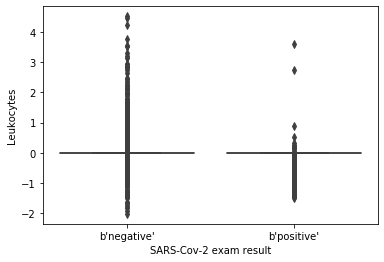

In [20]:
ax = sns.boxplot(x="SARS-Cov-2 exam result", y="Leukocytes",data=balancedata )

In [ ]:
#Bar plot

In [24]:
data_result = balancedata[['SARS-Cov-2 exam result']]
balancedata['SARS-Cov-2 exam result'].replace({b'negative':'be_negative',b'positive':'be_positive'}, inplace=True)

dataset = balancedata.groupby('SARS-Cov-2 exam result')[whiteBloodCell].mean()
dataset


,Lymphocytes,Leukocytes,Basophils,Eosinophils,Monocytes
SARS-Cov-2 exam result,,,,,
be_negative,0.000622,0.011773,0.002571,0.007860,-0.008045
be_positive,-0.003705,-0.095924,-0.020223,-0.065756,0.064950


SARS-Cov-2 exam result  be_negative  be_positive
Lymphocytes                0.000622    -0.003705
Leukocytes                 0.011773    -0.095924
Basophils                  0.002571    -0.020223
Eosinophils                0.007860    -0.065756
Monocytes                 -0.008045     0.064950


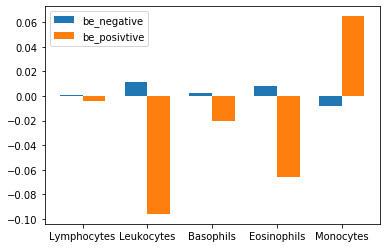

In [25]:
indx = np.arange(len(whiteBloodCell))
print(dataset.T)


Lymphocytes_means_negative = list(dataset.T['be_negative'])
Lymphocytes_means_positve = list(dataset.T['be_positive'])

bar_width = 0.35
fig, ax = plt.subplots()

bar_negative = ax.bar(indx - bar_width/2,Lymphocytes_means_negative,bar_width, label ='be_negative')
bar_positive = ax.bar(indx + bar_width/2,Lymphocytes_means_positve,bar_width, label ='be_posivtive')

ax.set_xticks(indx)
ax.set_xticklabels(whiteBloodCell)

ax.legend()
plt.show()

In [27]:
#Scatter Plot

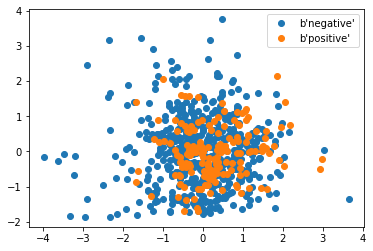

In [28]:
data = arff.loadarff('covidbalance.arff')
df = pd.DataFrame(data[0])

#เปรียบเทียบจำนวนเม็ดเลือดแดงกับเม็ดเลือดขาวระหว่างคนที่เป็นกับไม่เป็น
groups = df.groupby("SARS-Cov-2 exam result")
for name, group in groups :
    plt.plot(group["Red blood Cells"],group["Lymphocytes"], marker="o", linestyle="", label=name)
plt.legend()

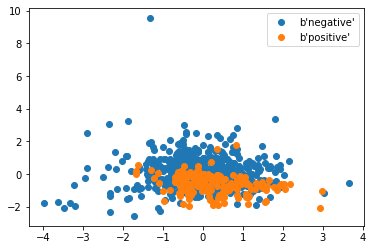

In [29]:
#เปรียบเทียบจำนวนเม็ดเลือดแดงกับเกล็ดเลือดระหว่าง คนที่เป็น กับไม่เป็น

groups = df.groupby("SARS-Cov-2 exam result")
for name, group in groups :
    plt.plot(group["Red blood Cells"],group["Platelets"], marker="o", linestyle="", label=name)
plt.legend()

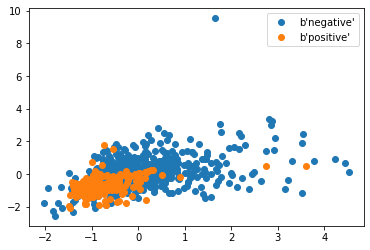

In [30]:
#เปรียบเทียบจำนวนเม็ดเลือดขาว เกล็ดเลือดระหว่าง คนที่เป็น กับไม่เป็น

groups = df.groupby("SARS-Cov-2 exam result")
for name, group in groups :
    plt.plot(group["Leukocytes"],group["Platelets"], marker="o", linestyle="", label=name)
plt.legend()